# class

In [22]:
class cal: # class
    def two(self, a, b): # method
        self.a = a
        self.b = b
    def add(self):
        f = self.a + self.b
        return f
    def mul(self):
        f = self.a * self.b
        return f
    def three(self, x,y,z):
        self.x, self.y, self.z = x,y,z
    def tot(self):
        f = self.x + self.y + self.z
        return f
# self = class 이름

In [2]:
a = cal() 

In [3]:
a.two(1,4) # self = a, a=1, b=4

In [4]:
a.add()

5

In [5]:
a.mul()

4

In [6]:
b = cal()

In [7]:
b.three(2,5,4) # self = b, x=2, y=5, z=4

In [8]:
b.tot()

11

In [9]:
class cal2:
    def __init__(self,a,b): # 생성자(constructor): 초기값
        self.a, self.b = a,b
    def div(self):
        f = self.a/self.b
        return f

In [10]:
c=cal2()

TypeError: __init__() missing 2 required positional arguments: 'a' and 'b'

In [11]:
c=cal2(3,5)

In [12]:
c.div()

0.6

# Neural Networks with Class 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

In [23]:
train_data = torchvision.datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = torchvision.transforms.ToTensor(), 
    download = True,            
) # train
test_data = torchvision.datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = torchvision.transforms.ToTensor()
) # validation

In [24]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [184]:
# mini batch
batch_size = 100
train_loader = torch.utils.data.DataLoader(
    dataset = train_data,
    batch_size = batch_size,
    shuffle = True
)
test_loader = torch.utils.data.DataLoader(
    dataset = test_data,
    batch_size = batch_size,
    shuffle = False
)

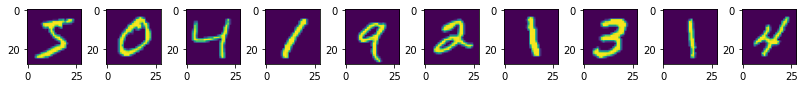

In [38]:
plt.figure(figsize=(14,1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_data.data[i])

In [90]:
28*28

784

In [169]:
"""
din, dh1, dh2, dout = 28*28,128,64,10
model = torch.nn.Sequential(
    torch.nn.Linear(din,dh1), # input - hidden1
    torch.nn.ReLU(),         # activation function of hidden layer 
    torch.nn.Linear(dh1,dh2), # input - hidden1
    torch.nn.ReLU(),         # activation function of hidden layer 
    torch.nn.Linear(dh2,dout), # hidden - out
    torch.nn.Softmax(dim=1)
)
"""

import torch.nn as nn
# 위와 같은 모델을 클래스를 이용하여 작성
class net(nn.Module): # nn.Module 상속(inheritance)
    def __init__(self): # 초기값
        super(net, self).__init__() # nn.Module의 함수를 model에서 사용 
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64,10)

    def forward(self, x):
        #x = self.flatten(x,start_dim=1)/255 # flatten
        x = x.view(-1, 784).float()
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.fc2(x)
        x = nn.functional.relu(x)
        x = self.fc3(x)
        x = nn.functional.softmax(x,dim=1)
        return x

In [170]:
model = net()

# loss and optimizer
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [171]:
model

net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [185]:
# training
def train(model, criterion, optimizer, data):
    model.train() # training
    for X,y in data:
        y_pred = model(X)
        loss = criterion(y_pred,y)
        
        optimizer.zero_grad() # zero_grad(): 미분값 초기화
        loss.backward() # backpropagation
        optimizer.step() # update weights and biases

In [186]:
train(model, criterion, optimizer, train_loader)

In [189]:
def evaluation(model, criterion, optimizer, data):
    model.eval() #evaluation
    test_loss = 0
    with torch.no_grad(): # no update
        for X, y in data:
            y_pred = model(X)
            test_loss += criterion(y_pred, y)
            
            prediction = y_pred.max(1)[1] # max indices
            corrects = (prediction == y)
            accuracy = corrects.sum().float() / float( y.size(0) )
    return test_loss, accuracy        

In [195]:
nums_epoch = 100
for epoch in range(nums_epoch):
    train(model, criterion, optimizer, train_loader)
    
    if(epoch%10==0):
        E, accu = evaluation(model, criterion, optimizer, test_loader)
        print(epoch, "loss=", E.item(), "accu=", accu.item())

0 loss= 148.4820556640625 accu= 0.9800000190734863
10 loss= 148.52606201171875 accu= 0.9800000190734863
20 loss= 148.37416076660156 accu= 1.0
30 loss= 148.26739501953125 accu= 1.0
40 loss= 148.30715942382812 accu= 0.9900000095367432
50 loss= 148.07022094726562 accu= 0.9800000190734863
60 loss= 148.4173583984375 accu= 0.9800000190734863
70 loss= 148.29747009277344 accu= 0.9800000190734863
80 loss= 148.15309143066406 accu= 0.9900000095367432
90 loss= 148.32797241210938 accu= 0.9900000095367432
